# Algoritmos de otimização - calendário de voos

## Representação do problema

In [1]:
pessoas = [('Lisboa', 'LIS'),
           ('Madrid', 'MAD'),
           ('Paris', 'CDG'),
           ('Dublin', 'DUB'),
           ('Bruxelas', 'BRU'),
           ('Londres', 'LHR')]

In [2]:
pessoas[5]

('Londres', 'LHR')

In [3]:
destino = 'FCO'

In [4]:
voos = {}
for linha in open('/media/dev/UbuntuFiles/sandbox/inteligencia-artificial/flights.txt'):
  origem, destino, saida, chegada, preco = linha.split(',')
  voos.setdefault((origem, destino), [])
  voos[(origem, destino)].append((saida, chegada, int(preco)))

In [5]:
agenda = [1,2, 3,2, 7,3, 6,3, 2,4, 5,3]

In [6]:
def imprimir_voos(agenda):
  id_voo = -1
  total_preco = 0
  for i in range(len(agenda) // 2):
    nome = pessoas[i][0]
    origem = pessoas[i][1]
    id_voo += 1
    ida = voos[(origem, destino)][agenda[id_voo]]
    total_preco += ida[2]
    id_voo += 1
    volta = voos[(destino, origem)][agenda[id_voo]]
    total_preco += volta[2]
    print('%10s%10s %5s-%5s %3s %5s-%5s %3s' % (nome, origem, ida[0], ida[1], ida[2],
                                                volta[0], volta[1], volta[2]))
  print('Preço total: ', total_preco)

In [7]:
agenda = [1,0, 3,2, 7,1, 6,3, 2,4, 5,3]
imprimir_voos(agenda)

    Lisboa       LIS  7:39-10:24 219  6:19- 8:13 239
    Madrid       MAD 11:01-12:39 260  9:11-10:42 172
     Paris       CDG 17:07-20:04 291  8:23-11:07 143
    Dublin       DUB 15:27-17:18 151 10:33-12:03  74
  Bruxelas       BRU  9:08-12:12 364 12:20-16:34 500
   Londres       LHR 13:40-15:38 137 10:32-13:16 139
Preço total:  2689


## Fitness function

In [8]:
def fitness_function(agenda):
  id_voo = -1
  total_preco = 0
  for i in range(len(agenda) // 2):
    origem = pessoas[i][1]
    id_voo += 1
    ida = voos[(origem, destino)][agenda[id_voo]]
    total_preco += ida[2]
    id_voo += 1
    volta = voos[(destino, origem)][agenda[id_voo]]
    total_preco += volta[2]

  return total_preco

In [ ]:
agenda = [1,7, 3,1, 1,1, 6,3, 2,4, 5,3]
fitness_function(agenda)

2619

<font color='red'>Atualização JAN/2024 relacionada à instalação do mlrose</font>

In [9]:
!git clone https://github.com/gkhayes/mlrose.git
!pip install mlrose/.

Cloning into 'mlrose'...
remote: Enumerating objects: 853, done.
remote: Counting objects: 100% (274/274), done.
remote: Compressing objects: 100% (40/40), done.
remote: Total 853 (delta 245), reused 234 (delta 234), pack-reused 579 (from 1)
Receiving objects: 100% (853/853), 406.91 KiB | 3.28 MiB/s, done.
Resolving deltas: 100% (554/554), done.
Processing ./mlrose
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.8/60.8 kB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.1/13.1 MB 11.1 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.8/40.8 MB 10.7 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 301.8/301.8 kB 9.9 MB/s eta 0:00:00
  Created wheel for mlrose: filename=mlrose-1.3.0-py3-none-any.whl size=27705 sha256=16ccdee13ef7c70b2a78464b4c5220b810f596f66b50d50320fb4bc9e2a3bc5c
  Stored 

In [10]:
!pip install mlrose

In [12]:
import six
import sys
sys.modules['sklearn.externals.six'] = six

In [13]:
import mlrose

In [14]:
fitness = mlrose.CustomFitness(fitness_function)

In [15]:
problema = mlrose.DiscreteOpt(length=12, fitness_fn=fitness, maximize = False, max_val = 10)

## Hill climb

In [23]:
melhor_solucao, melhor_custo = mlrose.hill_climb(problema, random_state = 0)
melhor_solucao, melhor_custo

(array([2, 6, 5, 7, 8, 1, 3, 6, 0, 2, 9, 1]), 1566.0)

In [24]:
imprimir_voos(melhor_solucao)

    Lisboa       LIS  9:15-12:03  99 15:07-17:21 129
    Madrid       MAD 14:22-16:32 126 17:06-20:00  95
     Paris       CDG 18:23-21:35 134  8:23-11:07 143
    Dublin       DUB 11:16-13:29  83 15:25-16:58  62
  Bruxelas       BRU  6:12-10:22 230  9:49-13:51 229
   Londres       LHR 20:30-23:11 114  8:19-11:16 122
Preço total:  1566


In [25]:
voos[('BRU', 'FCO')]

[('6:12', '10:22', 230),
 ('7:53', '11:37', 433),
 ('9:08', '12:12', 364),
 ('10:30', '14:57', 290),
 ('12:19', '15:25', 342),
 ('13:54', '18:02', 294),
 ('15:44', '18:55', 382),
 ('16:52', '20:48', 448),
 ('18:26', '21:29', 464),
 ('20:07', '23:27', 473)]

## Simulated annealing

In [40]:
melhor_solucao, melhor_custo = mlrose.simulated_annealing(problema, schedule=mlrose.GeomDecay(init_temp=10000), random_state=4)
melhor_solucao, melhor_custo

(array([2, 1, 5, 3, 9, 1, 9, 6, 0, 2, 9, 1]), 1668.0)

In [36]:
imprimir_voos(melhor_solucao)

    Lisboa       LIS 15:03-16:42 135 16:35-18:56 144
    Madrid       MAD 12:44-14:17 134 19:32-21:25 160
     Paris       CDG 18:23-21:35 134 12:37-15:05 170
    Dublin       DUB  8:04-10:11  95  6:39- 8:09  86
  Bruxelas       BRU  6:12-10:22 230 10:51-14:16 256
   Londres       LHR 13:40-15:38 137 10:32-13:16 139
Preço total:  1820


## Algoritmo genético

Em algoritimos geneticos são geradas varias soluções randomicas

Criar uma população inicial,

População é um conjunto com várias soluções e cada item da lista é um individuo

o cromossomo é o conjunto de todos os alores de um individuo

Gene, cada valor dentro do individuo

avaliar a populoção é aplicar a fitnesse function

critério de parada é definido peo número de gerações

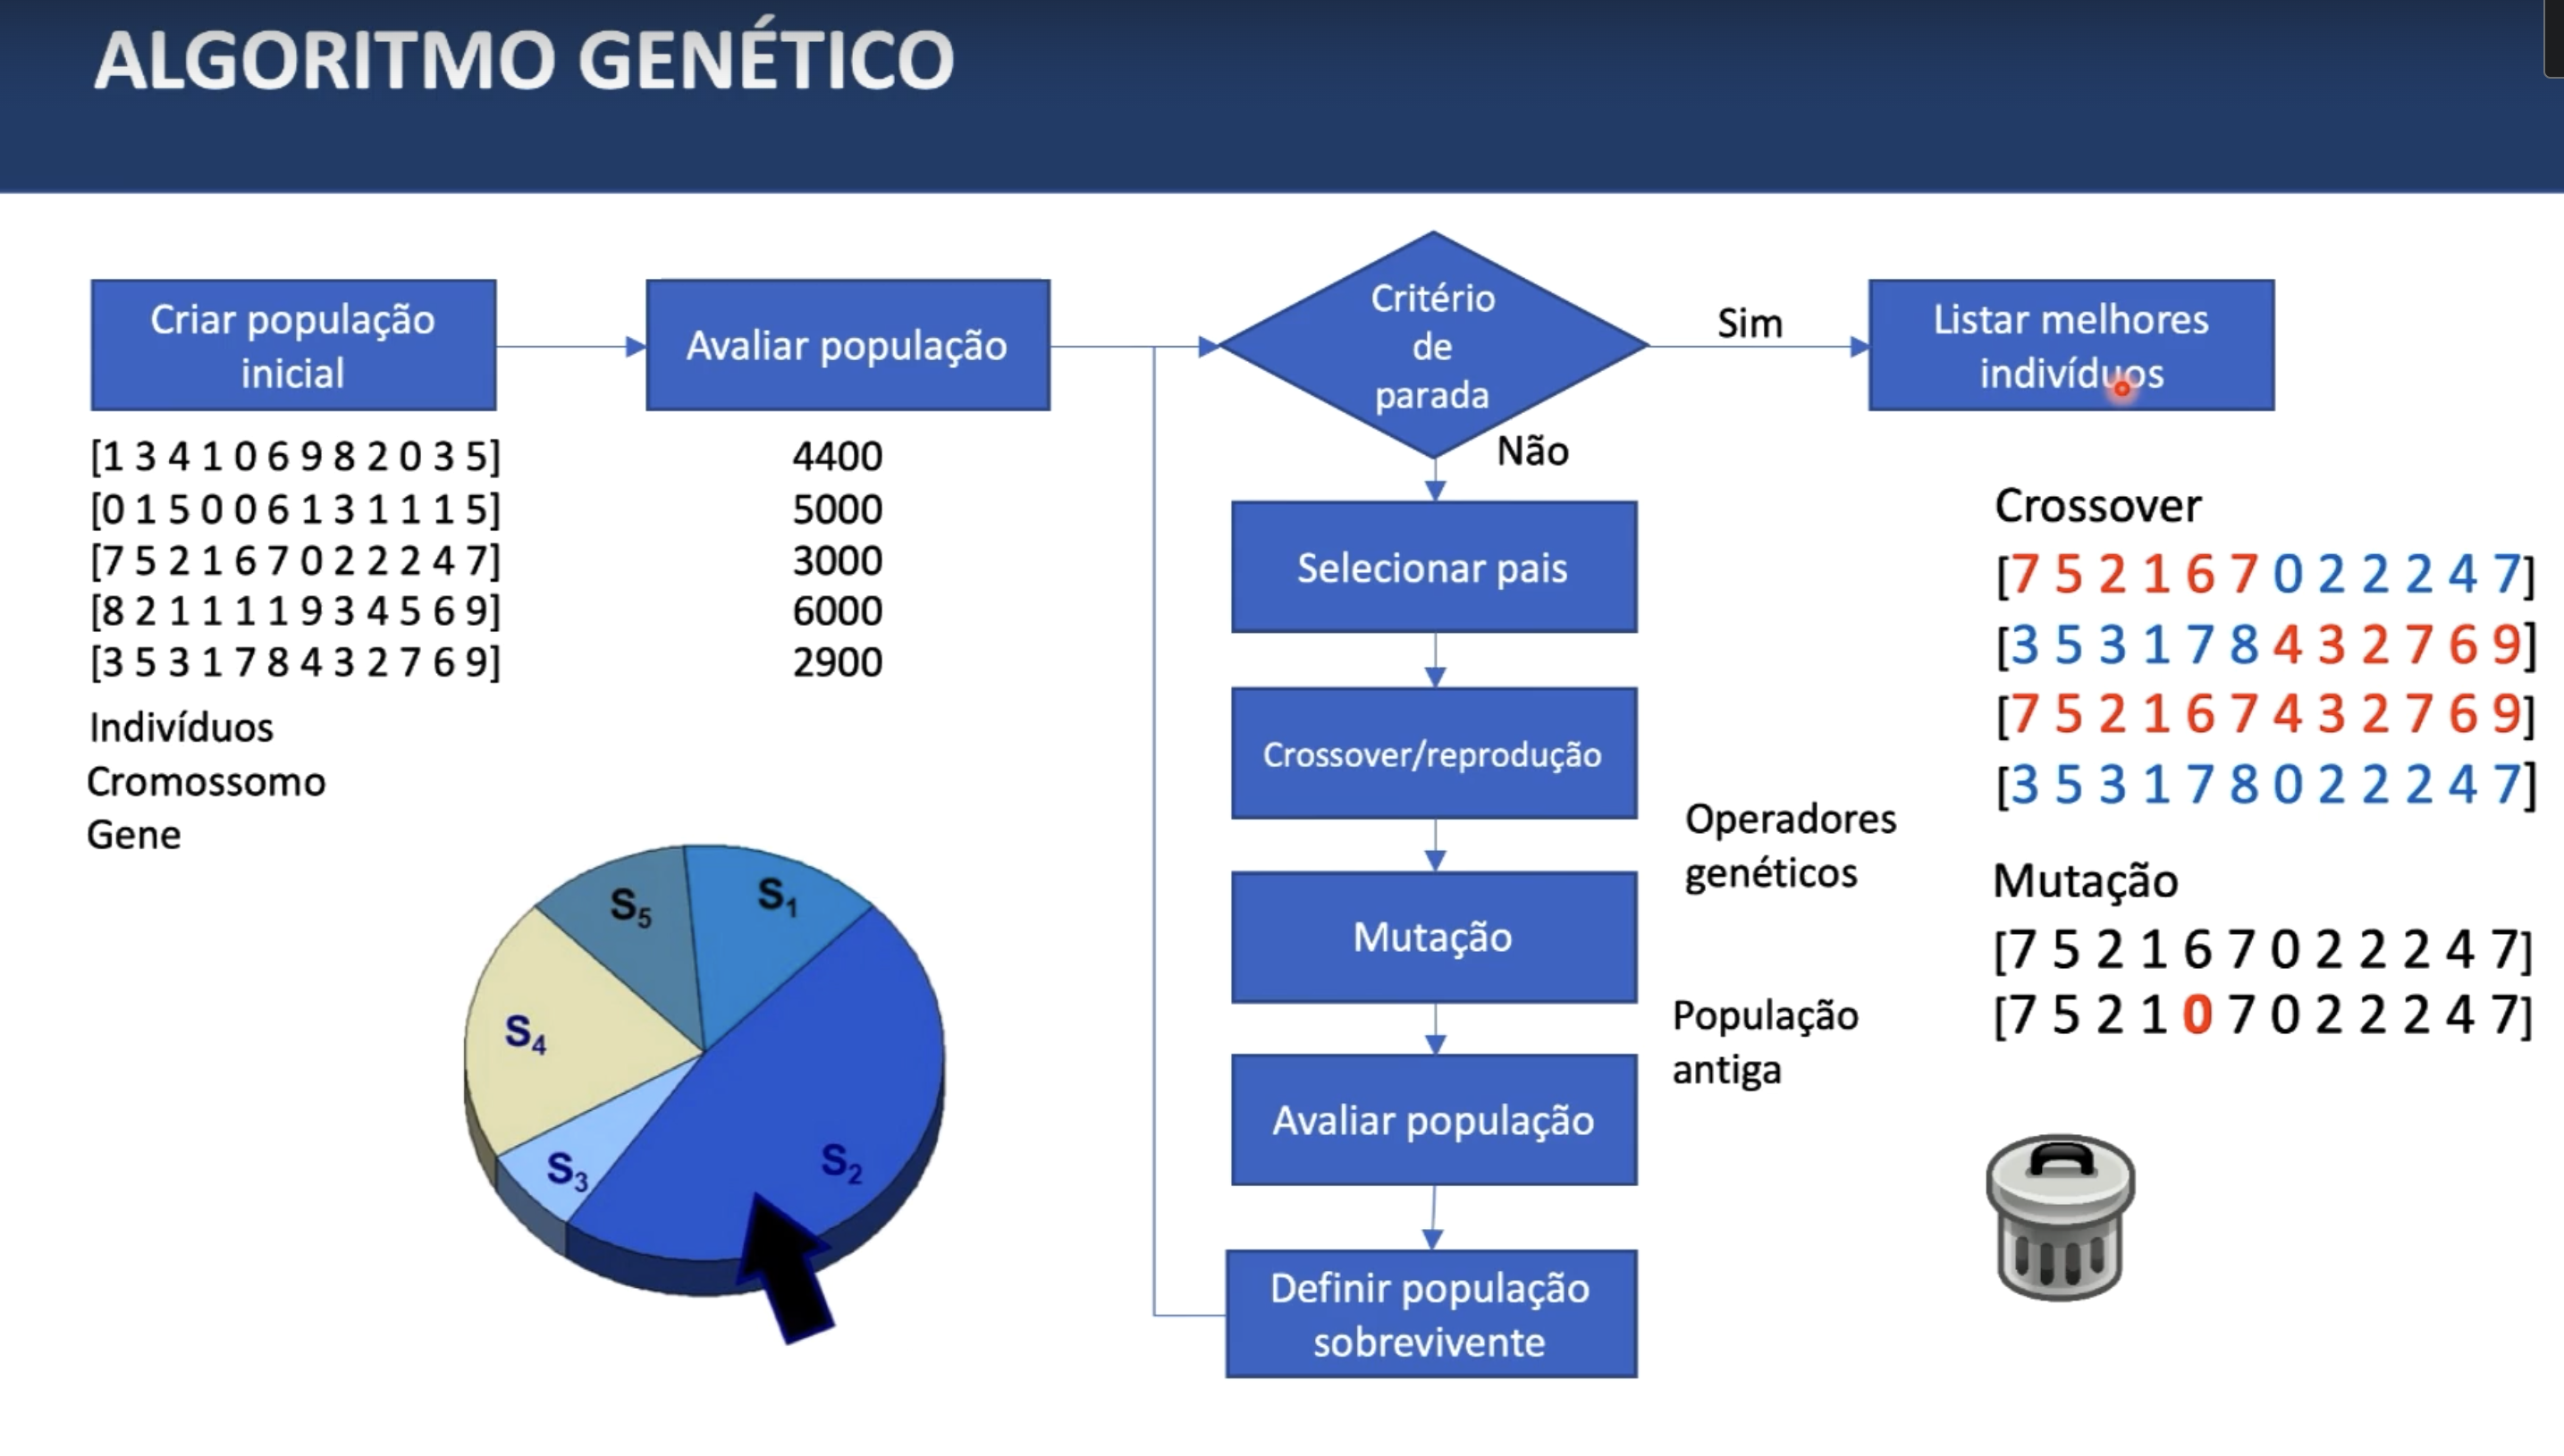

In [52]:
melhor_solucao, melhor_custo = mlrose.genetic_alg(problema, pop_size=500, mutation_prob=0.2, random_state=1)
melhor_solucao, melhor_custo

(array([6, 6, 5, 8, 3, 0, 2, 5, 0, 3, 1, 5]), 1966.0)

In [43]:
imprimir_voos(melhor_solucao)

    Lisboa       LIS 16:51-19:09 147 11:07-13:24 171
    Madrid       MAD  8:25-10:34 157  9:11-10:42 172
     Paris       CDG 19:53-22:21 173  6:33- 9:14 172
    Dublin       DUB 11:16-13:29  83 18:24-20:49 124
  Bruxelas       BRU  6:12-10:22 230 10:51-14:16 256
   Londres       LHR 12:08-14:59 149  8:19-11:16 122
Preço total:  1956
